In [1]:
import pandas as pd
import requests
import matplotlib.pyplot as plt
import numpy as np

## Step 1: Retrieve Data
The data is retrieved from the interactive Summary Health Statistics for Children using the NCHS Data Query System (DQS).

In [2]:
json_url = "https://data.cdc.gov/resource/b5qi-b3hv.json?$query=SELECT%0A%20%20%60topic%60%2C%0A%20%20%60subtopic%60%2C%0A%20%20%60subtopic_id%60%2C%0A%20%20%60classification%60%2C%0A%20%20%60classification_id%60%2C%0A%20%20%60group%60%2C%0A%20%20%60group_id%60%2C%0A%20%20%60group_order%60%2C%0A%20%20%60subgroup%60%2C%0A%20%20%60subgroup_id%60%2C%0A%20%20%60subgroup_order%60%2C%0A%20%20%60estimate_type%60%2C%0A%20%20%60estimate_type_id%60%2C%0A%20%20%60time_period%60%2C%0A%20%20%60time_period_id%60%2C%0A%20%20%60estimate%60%2C%0A%20%20%60standard_error%60%2C%0A%20%20%60estimate_lci%60%2C%0A%20%20%60estimate_uci%60%2C%0A%20%20%60flag%60%2C%0A%20%20%60footnote_id_list%60%0AWHERE%0A%20%20caseless_one_of(%60topic%60%2C%20%22Well%20child%20check-up%22)%0A%20%20AND%20caseless_one_of(%60group%60%2C%20%22Health%20insurance%20coverage%22)"
data = requests.get(json_url)
data = data.json()

## Step 2: Select Data
The data is selected to include the columns of data required to process and visualize.

In [3]:
df = pd.DataFrame(data)
results_df = df[["subgroup", "time_period", "estimate"]]
print(results_df)

                    subgroup time_period estimate
0                    Private        2019     94.6
1                    Private        2020     92.4
2                    Private        2021     89.9
3                    Private        2022     92.3
4                    Private        2023     94.7
5   Medicaid or other public        2019     95.2
6   Medicaid or other public        2020     93.5
7   Medicaid or other public        2021     90.1
8   Medicaid or other public        2022     93.4
9   Medicaid or other public        2023     93.5
10            Other coverage        2019     95.9
11            Other coverage        2020     94.2
12            Other coverage        2021     91.4
13            Other coverage        2022     91.3
14            Other coverage        2023     95.2
15                 Uninsured        2019     74.1
16                 Uninsured        2020     69.9
17                 Uninsured        2021     64.8
18                 Uninsured        2022       73


## Step 3: Visualize Data
The data is visualized by both bar and line graphs to observe the utilization of pediatric health care check-ups by health insurnace coverage each year from the year 2019 to 2023.

                    subgroup  time_period  estimate
5   Medicaid or other public         2019      95.2
10            Other coverage         2019      95.9
0                    Private         2019      94.6
15                 Uninsured         2019      74.1
6   Medicaid or other public         2020      93.5
11            Other coverage         2020      94.2
1                    Private         2020      92.4
16                 Uninsured         2020      69.9
7   Medicaid or other public         2021      90.1
12            Other coverage         2021      91.4
2                    Private         2021      89.9
17                 Uninsured         2021      64.8
8   Medicaid or other public         2022      93.4
13            Other coverage         2022      91.3
3                    Private         2022      92.3
18                 Uninsured         2022      73.0
9   Medicaid or other public         2023      93.5
14            Other coverage         2023      95.2
4           

C:\Users\mkn11\AppData\Local\Temp\ipykernel_4244\263217020.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  results_df["time_period"] = results_df["time_period"].astype(int)
C:\Users\mkn11\AppData\Local\Temp\ipykernel_4244\263217020.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  results_df['estimate'] = results_df['estimate'].astype(float)


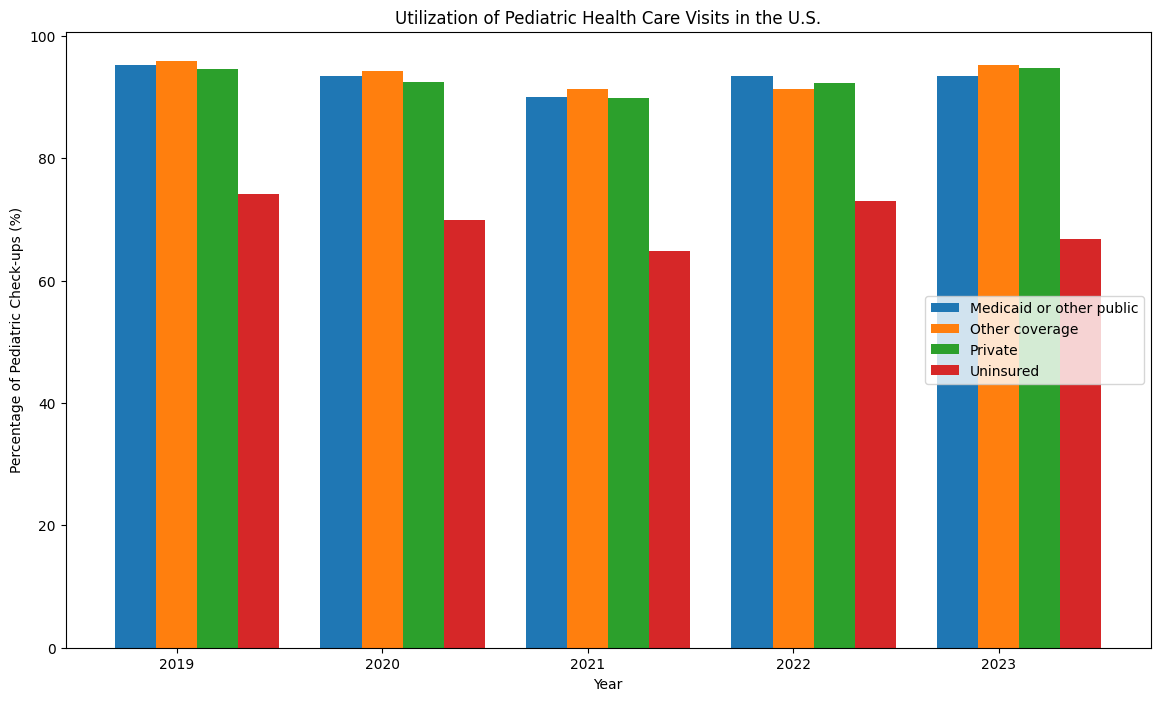

In [4]:
results_df["time_period"] = results_df["time_period"].astype(int)
results_df['estimate'] = results_df['estimate'].astype(float)
year_range = results_df[results_df["time_period"] >= results_df["time_period"].max()-4]
year_range = year_range.sort_values(by=["time_period", "subgroup"])
print(year_range)

plt.figure(figsize=(14, 8))
bar_width = 0.2
years = year_range["time_period"].unique()
subgroups = year_range["subgroup"].unique()
positions = np.arange(len(years))

for i, subgroup in enumerate(subgroups):
    subgroup_data = year_range[year_range["subgroup"] == subgroup]
    bar_positions = positions + (i * bar_width)
    plt.bar(bar_positions, subgroup_data["estimate"], bar_width, label=subgroup)

plt.title("Utilization of Pediatric Health Care Visits in the U.S.")
plt.xlabel("Year")
plt.ylabel("Percentage of Pediatric Check-ups (%)")
plt.xticks([r + bar_width for r in range(len(years))], years)
plt.legend(title="Health Insurance Coverage")
plt.legend(loc="center right")
plt.ylim(ymin=0)
plt.show()

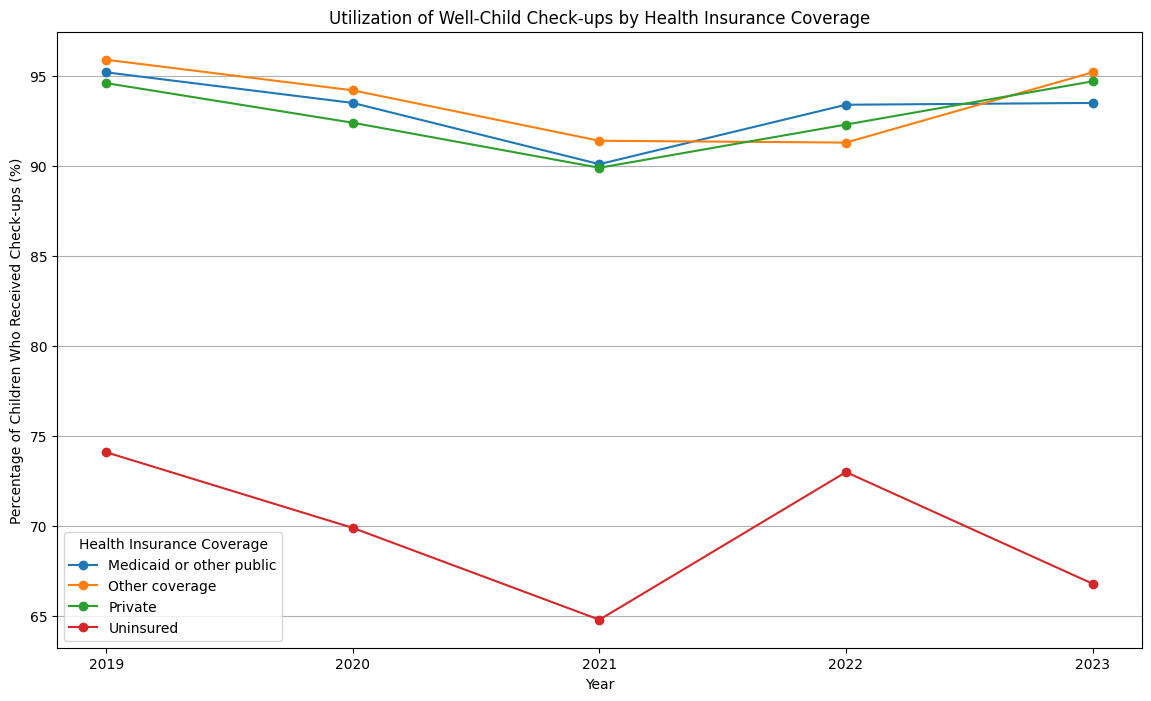

In [5]:
plt.figure(figsize=(14, 8))
for subgroup in year_range["subgroup"].unique():
    subgroup_data = year_range[year_range["subgroup"] == subgroup]
    plt.plot(subgroup_data["time_period"], subgroup_data["estimate"], marker="o", label=subgroup)

plt.title("Utilization of Well-Child Check-ups by Health Insurance Coverage")
plt.xlabel("Year")
plt.ylabel("Percentage of Children Who Received Check-ups (%)")
plt.xticks(year_range["time_period"].unique())
plt.legend(title="Health Insurance Coverage")
plt.grid(axis="y")
plt.show()

## Sources:

DQS NHIS Children Summary Statistics

https://data.cdc.gov/NCHS/DQS-NHIS-Children-Summary-Statistics/b5qi-b3hv/about_data

https://data.cdc.gov/resource/b5qi-b3hv.json
